In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


pd.set_option('display.max_colwidth', None)


In [2]:
data = pd.read_csv("../../data/working data/Filing_Dataset.csv")
data_codebook = pd.read_csv("../../data/acs/variables/acs5_2018_all_vars.csv")

In [3]:
data

,GEOID,B03002_003E,B01001_002E,B01001_003E,B19013_001E,B17001_002E,B25003_001E,B25070_001E,B25091_001E,B23025_003E,...,B25078_001E,B25079_001E,B25080_001E,B25082_001E,B25083_001E,B25086_001E,B25087_001E,B25088_001E,filings,filing_rate
0,110010068021,489,374,30,136964,NaN,379,129,250,638,...,781300,155019600.0,NaN,155019600.0,-666666666,NaN,250,2682,4.0,3.03
1,110010022023,90,319,0,95394,NaN,303,123,180,326,...,607100,80275000.0,80275000.0,80275000.0,-666666666,-666666666.0,180,1957,6.0,6.06
2,110010006004,1388,874,42,250001,NaN,694,53,641,1061,...,1232600,NaN,765930000.0,765930000.0,-666666666,NaN,641,2025,4.0,11.11
3,110010042011,920,726,72,79135,NaN,918,733,185,1052,...,997300,NaN,126205000.0,126205000.0,-666666666,-666666666.0,185,2067,51.0,7.73
4,110010011001,1579,777,62,135882,NaN,828,360,468,1047,...,1246600,454543700.0,454543700.0,454543700.0,-666666666,NaN,468,1908,10.0,3.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,510594516014,307,867,144,39129,NaN,339,339,0,514,...,-666666666,-666666666.0,-666666666.0,-666666666.0,-666666666,-666666666.0,0,-666666666,26.0,7.16
1494,515102013001,672,440,35,157778,NaN,332,31,301,522,...,923600,258651900.0,NaN,258651900.0,-666666666,-666666666.0,301,3058,5.0,17.24
1495,510594707002,930,636,26,162143,NaN,428,51,377,581,...,984700,NaN,NaN,320850400.0,-666666666,-666666666.0,377,1443,2.0,5.41
1496,510594822032,824,486,0,197702,NaN,399,101,298,573,...,764200,165395000.0,NaN,165395000.0,-666666666,-666666666.0,298,2187,2.0,2.08


In [4]:
data["state"] = data['GEOID'].astype(str).str[:2] # create state indicator

In [5]:
X = data.drop(["GEOID","filings","filing_rate"], axis=1)
y_filing = data["filings"]
y_rate = data["filing_rate"]

### Target Variable

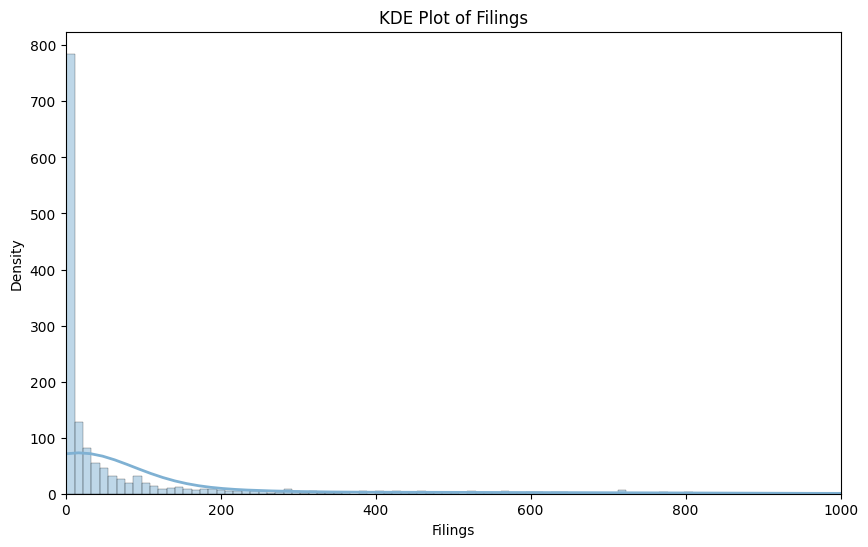

In [15]:
plt.figure(figsize=(10, 6))

sns.histplot(
    data["filings"],
    kde=True,
    color="#7fb1d3",        # Histogram color
    edgecolor="black",      # Optional: edges on bars
    line_kws={"color": "darkorange", "lw": 2}  # Correct: style the KDE line here
)

plt.xlabel("Filings")
plt.xlim(0, 1000)
plt.ylabel("Density")
plt.title("KDE Plot of Filings")

plt.show()

In [29]:
data["filings"].describe()

count    1498.000000
mean      112.941923
std       297.197487
min         1.000000
25%         2.000000
50%        10.000000
75%        63.750000
max      3094.000000
Name: filings, dtype: float64

In [28]:
data[data["state"] == "11"]

,GEOID,B03002_003E,B01001_002E,B01001_003E,B19013_001E,B17001_002E,B25003_001E,B25070_001E,B25091_001E,B23025_003E,...,B25078_001E,B25079_001E,B25080_001E,B25082_001E,B25083_001E,B25086_001E,B25087_001E,B25088_001E,filings,filing_rate
0,110010068021,489,374,30,136964,NaN,379,129,250,638,...,781300,155019600.0,NaN,155019600.0,-666666666,NaN,250,2682,4.0,3.03
1,110010022023,90,319,0,95394,NaN,303,123,180,326,...,607100,80275000.0,80275000.0,80275000.0,-666666666,-666666666.0,180,1957,6.0,6.06
2,110010006004,1388,874,42,250001,NaN,694,53,641,1061,...,1232600,NaN,765930000.0,765930000.0,-666666666,NaN,641,2025,4.0,11.11
3,110010042011,920,726,72,79135,NaN,918,733,185,1052,...,997300,NaN,126205000.0,126205000.0,-666666666,-666666666.0,185,2067,51.0,7.73
4,110010011001,1579,777,62,135882,NaN,828,360,468,1047,...,1246600,454543700.0,454543700.0,454543700.0,-666666666,NaN,468,1908,10.0,3.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,110010088024,305,666,52,82875,NaN,463,238,225,804,...,652300,NaN,NaN,97441000.0,-666666666,-666666666.0,225,1721,31.0,11.27
408,110010079031,455,961,53,85357,NaN,800,275,525,1037,...,656100,291983600.0,NaN,291983600.0,-666666666,-666666666.0,525,1809,24.0,8.79
409,110010089041,111,1439,47,36089,NaN,1391,1321,70,1729,...,439300,NaN,22250000.0,NaN,-666666666,-666666666.0,70,2093,614.0,43.48
410,110010074011,0,295,21,13080,NaN,292,254,38,211,...,289400,NaN,NaN,NaN,-666666666,NaN,38,1786,7.0,3.91


<Axes: xlabel='filings', ylabel='Count'>

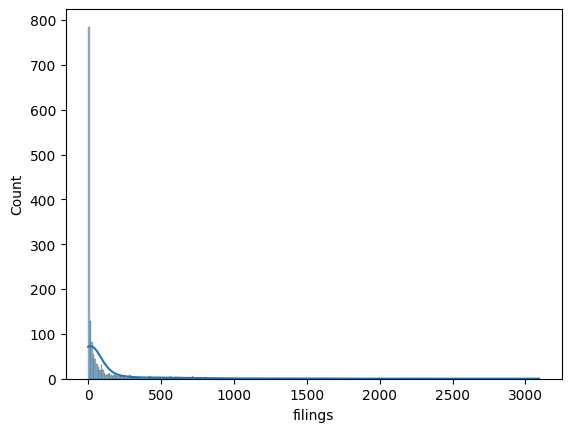

In [8]:
sns.histplot(y_filing, kde=True)

In [9]:
y_rate.describe()

count    1498.000000
mean       32.310587
std        94.104537
min         0.070000
25%         2.260000
50%         5.840000
75%        19.697500
max      2040.000000
Name: filing_rate, dtype: float64

<Axes: xlabel='filing_rate', ylabel='Count'>

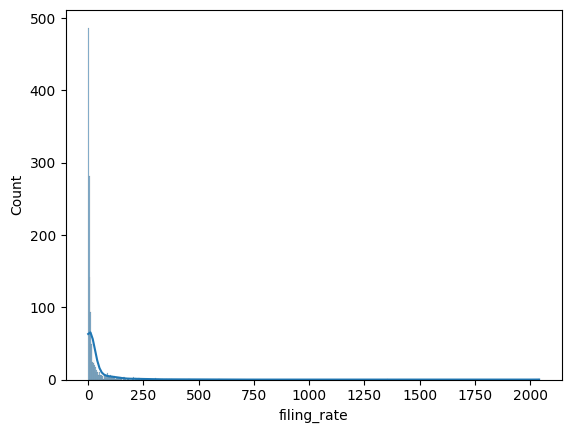

In [10]:
sns.histplot(y_rate, kde=True)

### Features

The ACS has some NaN values, and also has its own codes. 

-666666666 means missing data

-999999999 means not applicable

-222222222 means median value too large to compute


In [29]:
# replace missing data with nan
X.replace(-666666666, np.nan, inplace=True)

In [30]:
# check for non applicable or too large - there are none
X.columns[(X == -999999999).sum() > 1], X.columns[(X == -222222222).sum() > 1]

(Index([], dtype='object'), Index([], dtype='object'))

In [31]:
# how many columns have na values?  

X.isna().sum()[X.isna().sum() > 1]

B19013_001E      27
B17001_002E    1498
B11009_001E    1498
B16001_002E    1498
B25064_001E     167
               ... 
B25080_001E     881
B25082_001E     341
B25083_001E    1489
B25086_001E    1479
B25088_001E     168
Length: 118, dtype: int64

In [32]:
# these are the columns that have no data - only missing
# dropping these because there really isn't any imputation that can happen

na_cols = X.columns[X.isna().sum() == 1498]

na_cols

Index(['B17001_002E', 'B11009_001E', 'B16001_002E', 'B07001_050E',
       'B25106_001E', 'B25106_003E', 'B25106_006E', 'B25011_002E',
       'B25011_003E', 'B18101_009E', 'B25095_001E', 'B25119_001E',
       'B25119_002E', 'B08013_001E', 'B08014_001E', 'B25121_001E',
       'B25121_002E', 'B07001_017E', 'B07001_033E', 'B18101_001E',
       'B18101_002E', 'B18101_003E', 'B25105_001E', 'B25106_002E',
       'B25106_004E', 'B08006_001E', 'B08006_002E', 'B08006_003E',
       'B08006_008E', 'B08012_001E', 'B07001_001E', 'B16001_001E',
       'B16001_003E', 'B08006_007E', 'B08006_009E', 'B08006_010E',
       'B08141_001E', 'B08122_001E', 'B08126_001E', 'B08128_001E',
       'B08130_001E', 'B08132_001E', 'B08137_001E', 'B08201_001E',
       'B08202_001E', 'B08203_001E', 'B05002_013E', 'B05002_014E',
       'B05002_015E', 'B07003_001E', 'B07003_002E', 'B07003_003E',
       'B07003_004E', 'B07003_005E', 'B07003_006E', 'B08011_001E',
       'B08105A_001E', 'B08105B_001E', 'B08105D_001E', 'B08141

In [33]:
len(na_cols)

86

In [ ]:
X = X.drop(list(na_cols), axis=1)

Look at the remaining columns with na values as percentages of whole dataset

In [38]:
remaining_na = pd.DataFrame(X.isna().sum()[X.isna().sum() > 1]/len(X)*100)

remaining_na

,0
B19013_001E,1.802403
B25064_001E,11.148198
B25077_001E,10.080107
B25058_001E,11.682243
B25035_001E,1.134846
B25092_001E,8.144192
B08136_001E,91.455274
B01002A_001E,6.408545
B01002B_001E,12.416555
B01002D_001E,29.506008


In [39]:
len(remaining_na)

32

In [40]:
remaining_na[remaining_na[0] > 50] # these are the values with percentages greater than 50, where imputation would probably introduce a lot of bias

,0
B08136_001E,91.455274
B25062_001E,87.917223
B25066_001E,71.762350
B25079_001E,57.276368
B25080_001E,58.811749
B25083_001E,99.399199
B25086_001E,98.731642


In [41]:
X = X.drop(list(remaining_na[remaining_na[0] > 50].index), axis = 1) # drop those values

In [42]:
remaining_na = pd.DataFrame(X.isna().sum()[X.isna().sum() > 1]/len(X)*100) # lets look again

remaining_na

,0
B19013_001E,1.802403
B25064_001E,11.148198
B25077_001E,10.080107
B25058_001E,11.682243
B25035_001E,1.134846
B25092_001E,8.144192
B01002A_001E,6.408545
B01002B_001E,12.416555
B01002D_001E,29.506008
B01002H_001E,8.878505


In [43]:
len(remaining_na)

25

In [ ]:

remaining_na.merge(data_codebook, left_index=True, right_on="Variable")[["Variable","Label"]] # and I want to know what these variables are 

,Variable,Label
25346,B19013_001E,Estimate!!Median household income in the past 12 months (in 2018 inflation-adjusted dollars)
24454,B25064_001E,Estimate!!Median gross rent
966,B25077_001E,Estimate!!Median value (dollars)
5484,B25058_001E,Estimate!!Median contract rent
8559,B25035_001E,Estimate!!Median year structure built
1891,B25092_001E,Estimate!!Median selected monthly owner costs as a percentage of household income in the past 12 months --!!Total
9067,B01002A_001E,Estimate!!Median age --!!Total
13242,B01002B_001E,Estimate!!Median age --!!Total
5261,B01002D_001E,Estimate!!Median age --!!Total
20687,B01002H_001E,Estimate!!Median age --!!Total


In [45]:
X

,B03002_003E,B01001_002E,B01001_003E,B19013_001E,B25003_001E,B25070_001E,B25091_001E,B23025_003E,B23025_004E,B25064_001E,...,B25065_001E,B25067_001E,B25068_001E,B25069_001E,B25071_001E,B25076_001E,B25078_001E,B25082_001E,B25087_001E,B25088_001E
0,489,374,30,136964.0,379,129,250,638,624,1536.0,...,239100.0,239100.0,129,129,24.2,516700.0,781300.0,155019600.0,250,2682.0
1,90,319,0,95394.0,303,123,180,326,326,1164.0,...,146500.0,146500.0,123,123,34.2,382800.0,607100.0,80275000.0,180,1957.0
2,1388,874,42,250001.0,694,53,641,1061,1061,2740.0,...,139700.0,139700.0,53,53,20.9,334200.0,1232600.0,765930000.0,641,2025.0
3,920,726,72,79135.0,918,733,185,1052,1009,1769.0,...,1285500.0,1285500.0,733,733,28.3,370100.0,997300.0,126205000.0,185,2067.0
4,1579,777,62,135882.0,828,360,468,1047,1026,1565.0,...,581700.0,581700.0,360,360,24.9,804100.0,1246600.0,454543700.0,468,1908.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,307,867,144,39129.0,339,339,0,514,514,1561.0,...,448100.0,448100.0,339,339,46.3,NaN,NaN,NaN,0,NaN
1494,672,440,35,157778.0,332,31,301,522,522,2365.0,...,70700.0,70700.0,31,31,14.1,626600.0,923600.0,258651900.0,301,3058.0
1495,930,636,26,162143.0,428,51,377,581,567,3501.0,...,179900.0,179900.0,51,51,23.9,672300.0,984700.0,320850400.0,377,1443.0
1496,824,486,0,197702.0,399,101,298,573,573,2914.0,...,308200.0,308200.0,101,101,22.6,424900.0,764200.0,165395000.0,298,2187.0


### Imputating these variables with MICE

In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [25]:
cols_to_impute = list(remaining_na.index)

imputer = IterativeImputer(random_state=0, max_iter=10, imputation_order='descending')

In [26]:
X_imputed = X.copy()

n_iter = imputer.max_iter
for i in tqdm(range(n_iter), desc="Imputation Progress", unit="iteration"):
    X_imputed = imputer.fit_transform(X_imputed)

Imputation Progress:   0%|          | 0/10 [00:00<?, ?iteration/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
Imputation Progress: 100%|██████████| 10/10 [01:08<00:00,  6.81s/iteration]


In [27]:
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

X_imputed.isna().sum()[X_imputed.isna().sum() > 1]

Series([], dtype: int64)

In [44]:
pd.concat([X_imputed,y_rate,y_filing], axis=1)

NameError: name 'X_imputed' is not defined

In [ ]:
pd.concat([X_imputed,y_rate,y_filing], axis=1).to_csv("./data/working data/Filing_Dataset_Imputed.csv", index=False)